In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_test = pd.read_csv('./test.csv')
df_train = pd.read_csv('./train.csv')

In [30]:
!pip install missingno

In [6]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [23]:
#수치형 변수
numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index
print("Number of Numerical features:", len(numerical_feats))

# 명목형 변수
categorical_feats=df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features:", len(categorical_feats))

Number of Numerical features: 38
Number of Categorical features: 43


In [24]:
# 변수명 확인
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

## 이상치 탐색 및 제거

In [34]:
# train 데이터의 이상치를 탐색
# IQR (튜키의 방법)을 이용한 함수를 지정하여 이상치 탐색을 수행

def detect_outliers(df, n, features):
    outlier_indices=[]
    for col in features:
        Q1=np.percentile(df[col], 25)
        Q3=np.percentile(df[col], 75)
        IQR= Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(k for k, v in outlier_indices.items() if v>n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(df_train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [35]:
# 이상치가 발견된 행을 확인
df_train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
718,719,60,RL,96.0,10542,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,341000
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970


In [36]:
# 이상치들을 제거해주고, 결과를 확인
# 행의 수가 1338로 줄어든것을 확인할 수 있음

df_train=df_train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
df_train.shape

(1326, 81)

## 결측치 확인

In [37]:
# train 데이터 각 column의 결측치가 몇 %인지 확인합니다.
# df_train[col].isnull().sum(): 해당 열의 결측치가 몇개인지 알 수 있게 하는 문장입니다.
# (True=1(결측치), FALSE=0으로 계산)
# df_train[col].shape[0]: 해당 열의 차원( 열이 지정되어 있으므로 행의 갯수를 보여줍니다.)
# 100* (df_train[col].isnull().sum()/df_train[col].shpae[0]): 위의 설명을 통해 %를 출력해주는 문장임을 알 수 있다.)

for col in df_train.columns:
    msperc='column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msperc)

column:         Id	 percent of NaN value: 0.00%
column: MSSubClass	 percent of NaN value: 0.00%
column:   MSZoning	 percent of NaN value: 0.00%
column: LotFrontage	 percent of NaN value: 17.19%
column:    LotArea	 percent of NaN value: 0.00%
column:     Street	 percent of NaN value: 0.00%
column:      Alley	 percent of NaN value: 94.04%
column:   LotShape	 percent of NaN value: 0.00%
column: LandContour	 percent of NaN value: 0.00%
column:  Utilities	 percent of NaN value: 0.00%
column:  LotConfig	 percent of NaN value: 0.00%
column:  LandSlope	 percent of NaN value: 0.00%
column: Neighborhood	 percent of NaN value: 0.00%
column: Condition1	 percent of NaN value: 0.00%
column: Condition2	 percent of NaN value: 0.00%
column:   BldgType	 percent of NaN value: 0.00%
column: HouseStyle	 percent of NaN value: 0.00%
column: OverallQual	 percent of NaN value: 0.00%
column: OverallCond	 percent of NaN value: 0.00%
column:  YearBuilt	 percent of NaN value: 0.00%
column: YearRemodAdd	 percent of

In [39]:
# test 데이터도 확인
# train, test 모두 PoolQc 데이터가 결측치가 가장 많음

for col in df_test.columns:
    msperc='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msperc)

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 92.67%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.14%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

<AxesSubplot:>

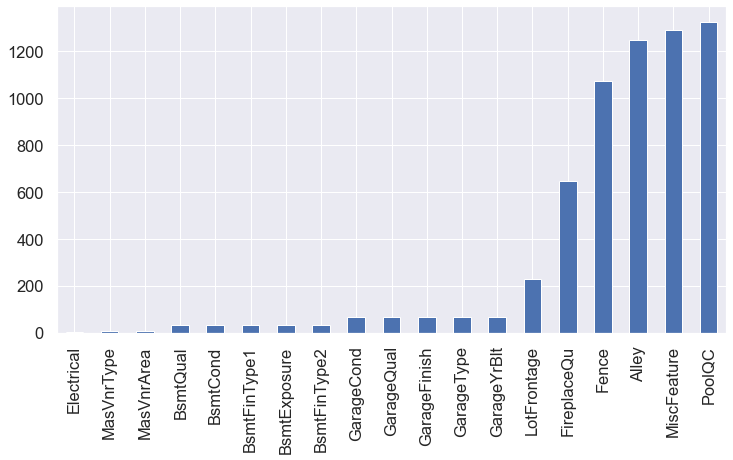

In [40]:
# 직관적으로 확인하기 위해 barplot을 그려봅니다.
missing = df_train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(12,6))

## Skewness (비대칭도) 확인

In [45]:
# 수치형 변수의 Skewness(비대칭도), Kurtosis (첨도)를 확인합니다.
# 이는 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다. (비대칭도: a=0이면 정규분포,
# a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)
# 비대칭도와 첨도를 띄는 변수가 여럿 보입니다. Target Feature인 "SalePrice" 또한 약간의
# 정도를 보이는 것으로 보임

for col in numerical_feats:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(df_train[col].skew()),
         '   ' ,
         'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
         )

Id              Skewness: 00.01     Kurtosis: -01.19
MSSubClass      Skewness: 01.37     Kurtosis: 001.49
LotFrontage     Skewness: 01.59     Kurtosis: 013.61
LotArea         Skewness: 07.92     Kurtosis: 127.53
OverallQual     Skewness: 00.10     Kurtosis: -00.13
OverallCond     Skewness: 00.72     Kurtosis: 001.20
YearBuilt       Skewness: -0.57     Kurtosis: -00.61
YearRemodAdd    Skewness: -0.51     Kurtosis: -01.28
MasVnrArea      Skewness: 02.57     Kurtosis: 010.54
BsmtFinSF1      Skewness: 00.65     Kurtosis: -00.51
BsmtFinSF2      Skewness: 04.84     Kurtosis: 026.59
BsmtUnfSF       Skewness: 00.85     Kurtosis: 000.23
TotalBsmtSF     Skewness: 00.23     Kurtosis: 001.11
1stFlrSF        Skewness: 00.62     Kurtosis: -00.17
2ndFlrSF        Skewness: 00.75     Kurtosis: -00.91
LowQualFinSF    Skewness: 12.68     Kurtosis: 168.93
GrLivArea       Skewness: 00.57     Kurtosis: 000.22
BsmtFullBath    Skewness: 00.58     Kurtosis: -00.93
BsmtHalfBath    Skewness: 04.94     Kurtosis: 

# EDA

- Numerical Data 탐색

수치형 데이터들을 알아보기 위해 다음 4가지의 Plot을 그립니다.
* Correlation Heat Map
* Zoomed Heat Map
* Pair Plot
* Scatter Plot

### Correlation Heat Map

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

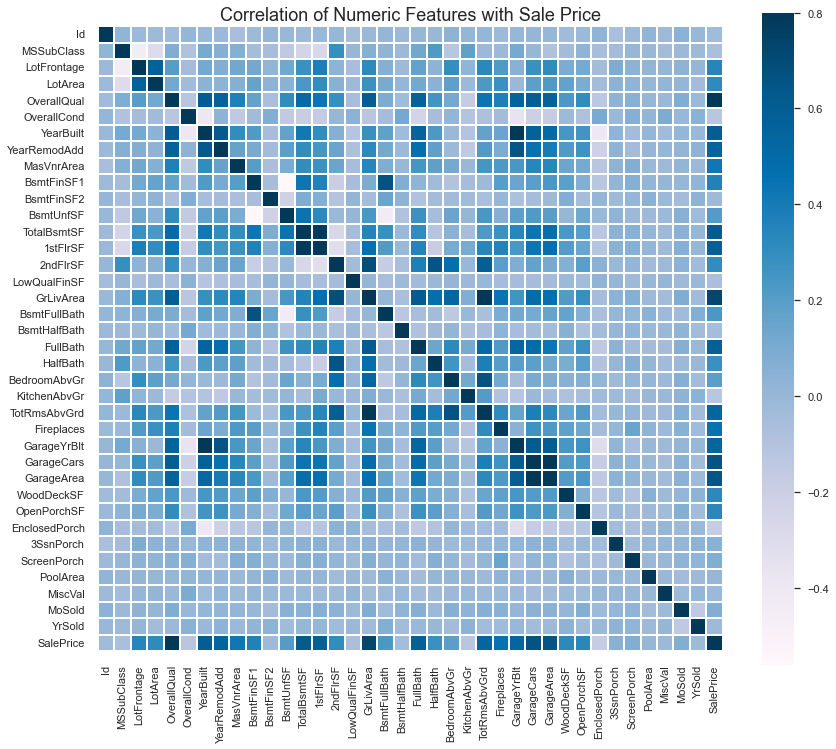

In [47]:
# Heat Map은 seaborn 덕분에 직관적으로 이해가 가능하여 변수 간 상관관계에 대하여 쉽게
# 알 수 있습니다.
# 또한 변수 간 다중 공선성을 감지하는데 유용합니다.
# 대각선 열을 제외한 박스 중 가장 진한 파란색을 띄는 박스가 보입니다.
# 첫 번째는 'TotalBsmtSF' 와 '1stFlrSF' 변수의 관계입니다.
# 두 번째는 'Garage'와 관련한 변수를 나타냅니다.
# 두 경우 모두 변수 사이의 상관 관계가 너무 강하여 다중 공선성(MultiColarisity) 상황이 나타날 수 있습니다.
# 또한 확인해야할 부분은 'SalePrice' 와의 상관 관계입니다.
# 'GrLivArea', 'TotalBsmtSF' 및 'OverallQual'은 큰 관계를 보입니다.
# 나머지 변수와의 상관 관계를 자세히 알아보기 위해 Zoomed Heat Map을 확인합니다.

corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax= plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=18)
sns.heatmap(corr_data.corr(), square = True, linewidths=0.1,
            cmap=colormap, linecolor='white', vmax=0.8)

### Zoomed Heat Map

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'FullBath', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')


<AxesSubplot:>

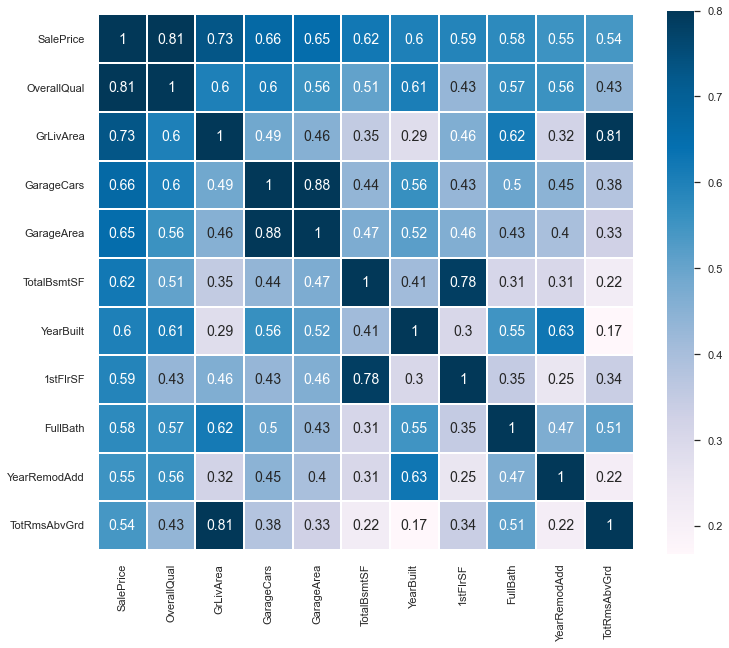

In [52]:
# 가장 눈에 띄는 GarageCars 와 GarageArea, TotalBsmtSF와 1stFlrSF는 서로 밀접하게 연관되어 있음을 알 수 있다.
# Target feature와 가장 밀접한 연관이 있는 feature는 'OverallQual', 'GrLivArea'및 'TotalBsmtSF'로 보임
# 먼저 말했던 GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF, TotRmsabvGrd와 GrLivArea는 모두 매우 유사한 정보를 보함하고 있으며 
# 다중공선성이 나타난다고 할 수 있다.
# SalePrice와 더 연관되어 있는 변수인 GarageCars와 TotalBsmtSF, GrLivArea를 남기고 나머지는 이후에 버리도록 한다.
# salePrice와의 연관을 알아보기 위해 PairPlot을 그려보도록 한다.

k = 11
cols = corr_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm=np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1, square=True, annot=True, cmap=colormap,
           linecolor='white', xticklabels = cols.values, annot_kws={'size':14}, yticklabels = cols.values)

### Pair Plot

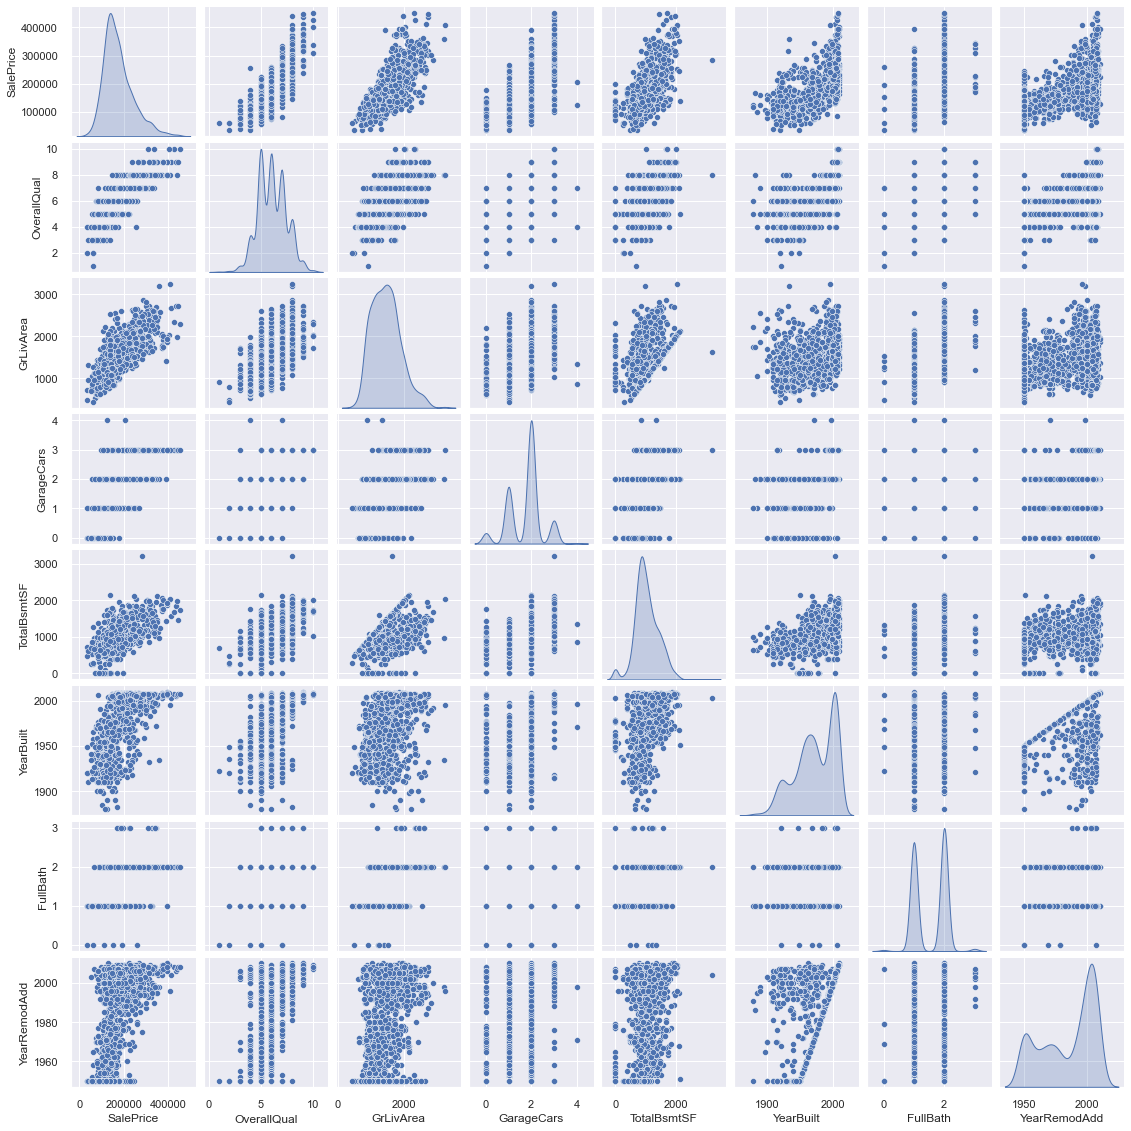

In [57]:
# 위의 Zoomed Heat Map에서 다중공선선을 보이는 변수 중 SalePrice와 연관이 덜 한 변수를 저외하고 PairPlot을 그립니다.
# 'TotalBsmSF'와 'GrLiveArea'는 데이터 설명에서 알 수 있듯이 지하실의 면적과 생활공간 면적을 의미
# 'TotalBsmtSF'와 'GrLiveArea'의 plot을 보면 점들이 직선처럼 그려지고 대부분의 점은 해당 선 아래에 유지됩니다.
# 이것은 일반적으로 지하실 면적이 지상 생활 면적과 같을 수 있지만, 더 크지는 않기 때문에 보여지는 특징
# 'SalePrice'와 'YearBuilt'의 plot을 보면 우상향 곡선을 보임
# 이것은 전년도 대비 주택 가격 상승의 가속을 의미

sns.set()
columns=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', 'YearBuilt', 'FullBath', 'YearRemodAdd'
       ]
sns.pairplot(df_train[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

### Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

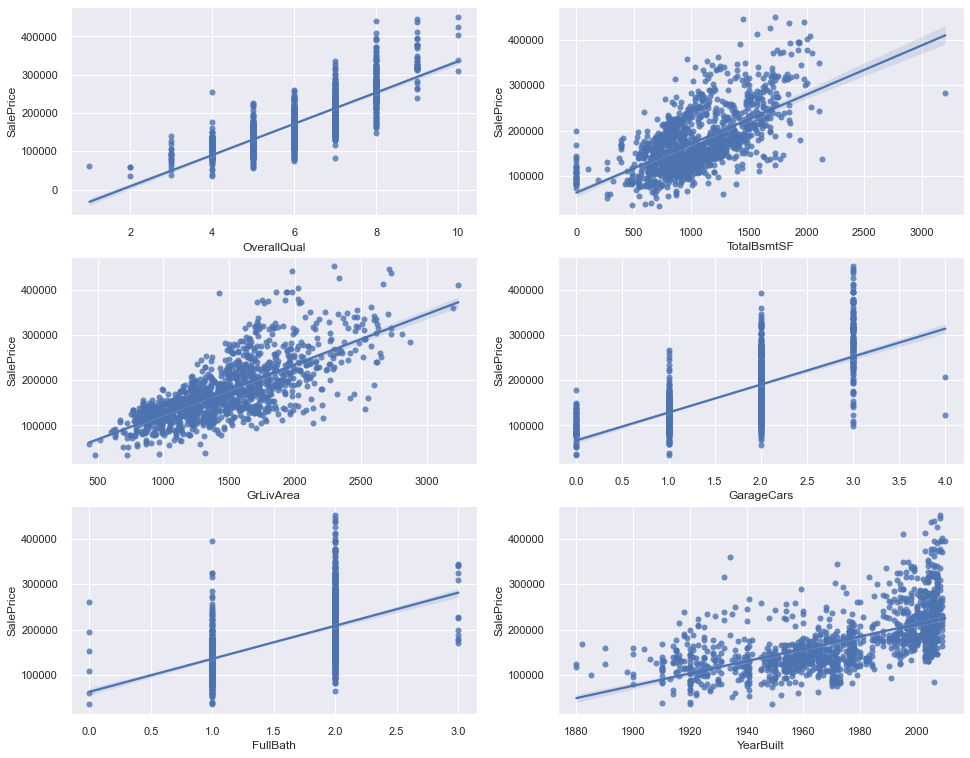

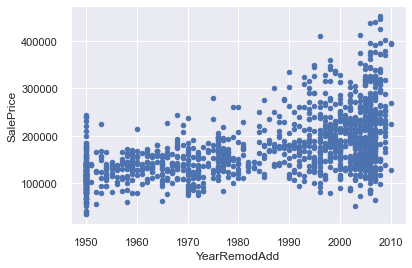

In [61]:
# Target Feature "SalePrice"와 가장 밀접한 연관이 있다고 판단됐던 변수들의 ScatterPlot을 그립니다.
# OverallQual, GarageCars, Fullbath와 같은 변수들은 실제로는 범주형 데이터의 특징을 보인다고 할 수 있습니다.
# (등급, 갯수등을 의미하기 때문)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))

OverallQual_scatter_plot = pd.concat([df_train['SalePrice'],df_train['OverallQual']], axis=1)
sns.regplot(x='OverallQual', y='SalePrice', data=OverallQual_scatter_plot, scatter=True, fit_reg=True, ax=ax1)

TotalBsmtSF_scatter_plot=pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=TotalBsmtSF_scatter_plot, scatter=True, fit_reg=True, ax=ax2)

GrLivArea_scatter_plot=pd.concat([df_train['SalePrice'],df_train['GrLivArea']], axis=1)
sns.regplot(x='GrLivArea', y='SalePrice', data=GrLivArea_scatter_plot, scatter=True, fit_reg=True, ax=ax3)

GarageCars_scatter_plot=pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
sns.regplot(x='GarageCars', y='SalePrice', data=GarageCars_scatter_plot, scatter=True, fit_reg=True, ax=ax4)

FullBath_scatter_plot=pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
sns.regplot(x='FullBath', y='SalePrice', data=FullBath_scatter_plot, scatter=True, fit_reg=True, ax=ax5)

YearBuilt_scatter_plot=pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.regplot(x='YearBuilt', y='SalePrice', data=YearBuilt_scatter_plot, scatter=True, fit_reg=True, ax=ax6)

YearRemodAdd_scatter_plot=pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd', 'SalePrice')

- Cateforical Data 탐색

남은 범주형 변수들도 확인해봅니다.

질적 변수를 사용하여 두 가지 방법을 구현할 수 있습니다.

첫 번째는 변수 값과 관련하여 SalePrice의 분포를 확인합니다.

두 번째로 가능한 범주별로 더미 변수를 만듭니다.

In [62]:
# 범주형 변수들과 범주들을 확인합니다.

for catg in list(categorical_feats):
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1044
RM          196
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
##################################################
Pave    1323
Grvl       3
Name: Street, dtype: int64
##################################################
Grvl    42
Pave    37
Name: Alley, dtype: int64
##################################################
Reg    852
IR1    436
IR2     31
IR3      7
Name: LotShape, dtype: int64
##################################################
Lvl    1201
Bnk      52
HLS      46
Low      27
Name: LandContour, dtype: int64
##################################################
AllPub    1326
Name: Utilities, dtype: int64
##################################################
Inside     963
Corner     234
CulDSac     79
FR2         46
FR3          4
Name: LotConfig, dtype: int64
##################################################
Gtl    1264
Mod      55
Sev       7
Name: LandSlope, dtype: int64
##################################################
NAmes      20

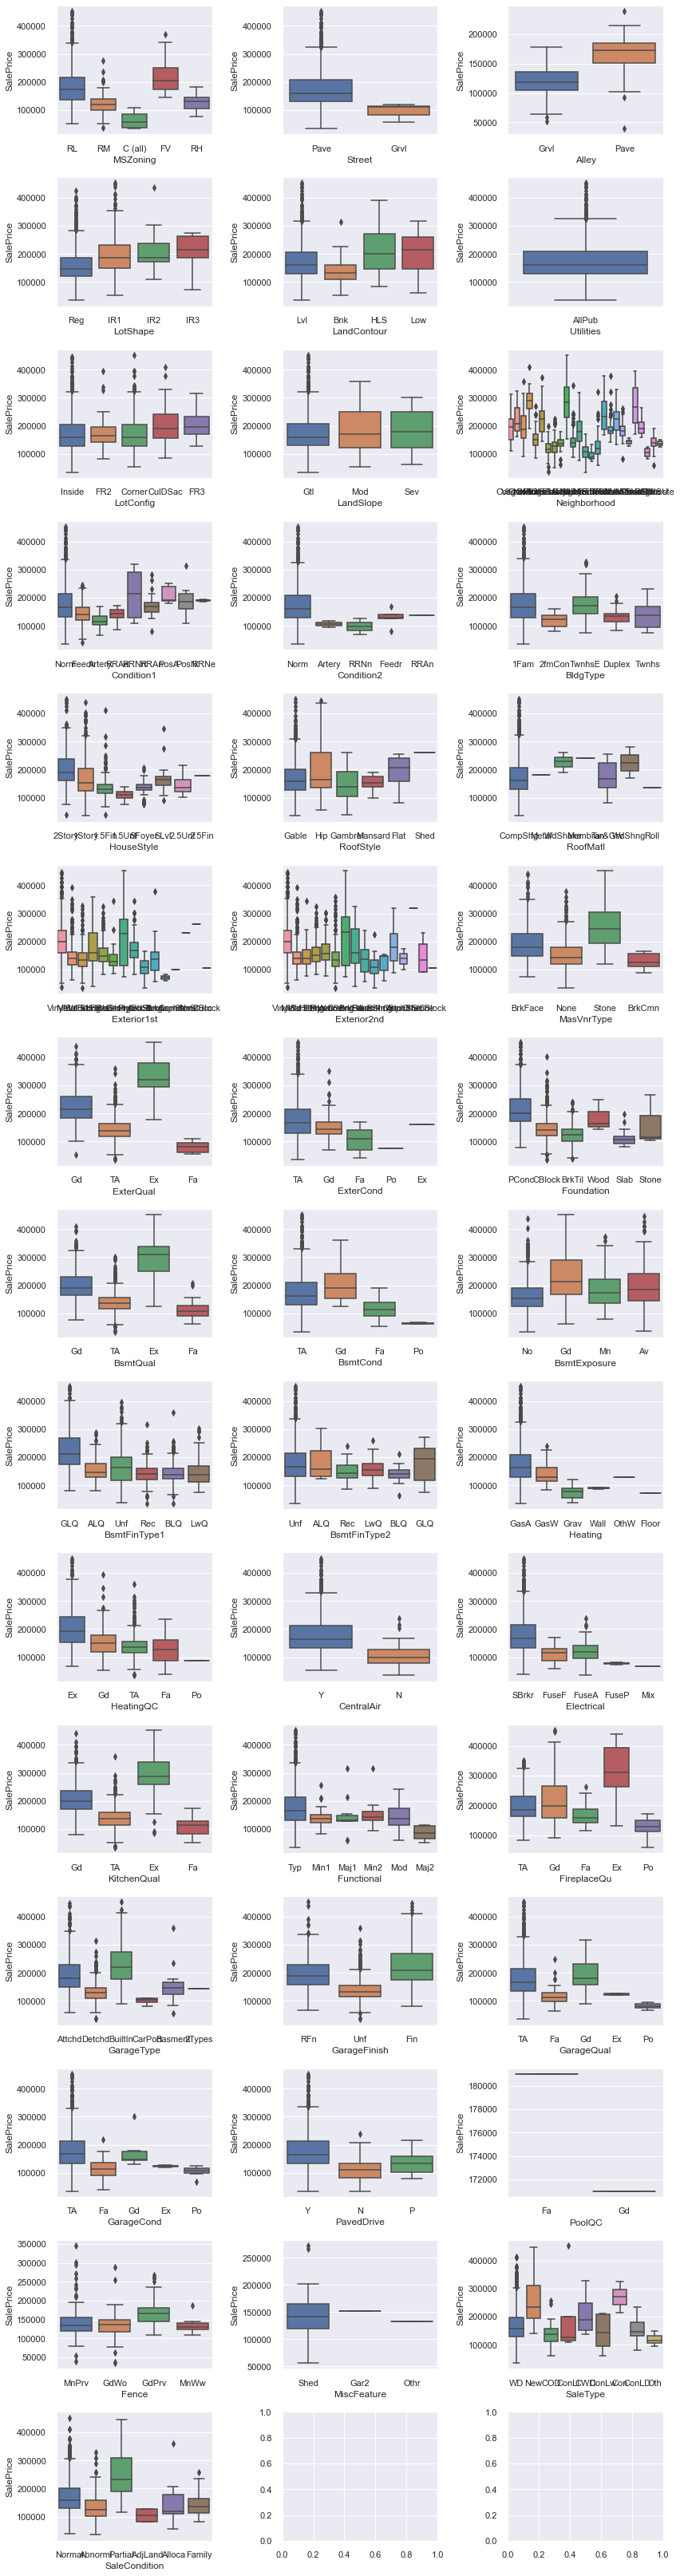

In [66]:
# BoxPlot을 그려 Categorical Feature와 SalePrice의 관계를 확인합니다.
# 일부 범주는 다는 범주보다 SalePrice와 관련하여 더 다양하게 보입니다.
# Neighborhood 변수는 주택 가격 편차가 매우 크므로 영향이 크다고 생각됩니다.
# SaleType 또한 마찬가지 입니다.
# 또한 수영장이 있으면 가격이 크게 증가하는 것 같습니다.
# 정리하면 SalePrice에 영향을 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있습니다.

li_cat_feats = list(categorical_feats)
nr_rows=15
nr_cols=3

fig, axs=plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i=r*nr_cols+c
        if i<len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax=axs[r][c])

plt.tight_layout()
plt.show()                        

In [67]:
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars',
                   'FullBath','YearBuilt','YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

# 편의를 위해 SalePrice와 관련이 큰 변수와 아닌 변수를 분리해놓습니다.
# "Id"는 submission 때문에 따로 빼놓겠습니다.

# Feature Engineering

### Log 변환

Skewness: 1.068576
Kurtosis: 1.361245


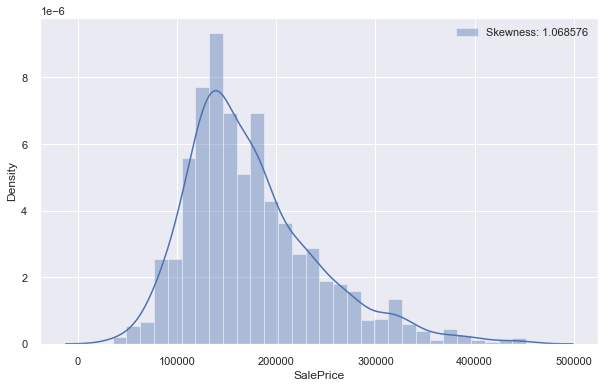

In [68]:
# Target Feature인 SalePrice의 비대칭도와 첨도를 확인합니다.
# 그래프와 수치를 확인하면 정상적으로 분포되지 않는 것을 확인할 수 있습니다.
# 예측의 정확도를 높히기 위해 변환을 수행합니다.

f, ax = plt.subplots(1, 1, figsize=(10,6))
g=sns.distplot(df_train["SalePrice"], color='b', label='Skewness: {:2f}'.format(df_train['SalePrice'].skew()), ax=ax)
g=g.legend(loc='best')

print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: -0.116626
Kurtosis: 0.537382


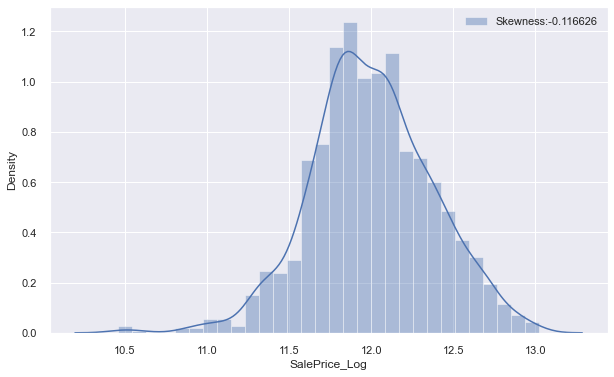

In [71]:
# kewness, Kurtosis를 없애주기 위해 로그를 취해줍니다.
# Log변환을 수행한 새로운 feature "SalePrice_Log"를 만들고 전 Feature인 "Saleprice"를 버려줍니다.
# 로그를 취해준 그래프와 수치가 바뀐 모습을 볼 수 있습니다.(정규근사화)

df_train["SalePrice_Log"]=df_train["SalePrice"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1,1, figsize=(10,6))
g=sns.distplot(df_train["SalePrice_Log"], color = 'b', label='Skewness:{:2f}'.format(df_train["SalePrice_Log"].skew()), ax=ax)
g=g.legend(loc="best")

print("Skewness: %f" % df_train["SalePrice_Log"].skew())
print("Kurtosis: %f" % df_train["SalePrice_Log"].kurt())

df_train.drop('SalePrice', axis=1, inplace=True)